<a href="https://colab.research.google.com/github/Michell203/DingLab/blob/main/DLabCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.9 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=8625b49d20fb796623a36ff79bcd872543a87988363ad2db521e3bf4e25bcc3a
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import math
import torch
import torch.nn as nn
import torch.optim as optim
from random import randrange
# from scipy.special import softmax

# https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html - Scanpy preprocess
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_h5ad.html - Scanpy h5ad
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_10x_h5.html - Scanpy 10x h5
# https://scanpy.readthedocs.io/en/stable/index.html - Scanpy webpage

# https://www.partek.com/webinar/understanding-data-formats-and-preprocessing/
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Preprocess
Get a sense of the data (GSM4504959_E12.5_filtered_gene_bc_matrices.h5)

Cell count: 9792,
Gene count: 27998

In [ ]:
t1 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504959_E12.5_filtered_gene_bc_matrices.h5")
t1.var_names_make_unique()
print(t1.X)

In [ ]:
# print(t1.X)
array = t1.X.toarray()
number = 0
for i in range(9791):
  number += array[i,27997]
mean_of_gene1 = number/9791
print(mean_of_gene1)

0.0013277499744663466


In [ ]:
t1.X

In [ ]:
sc.pp.normalize_total(t1, target_sum=1e4)

In [ ]:
pseudobulk_h5_file_1 = t1.X.mean(axis=0)
print(pseudobulk_h5_file_1)

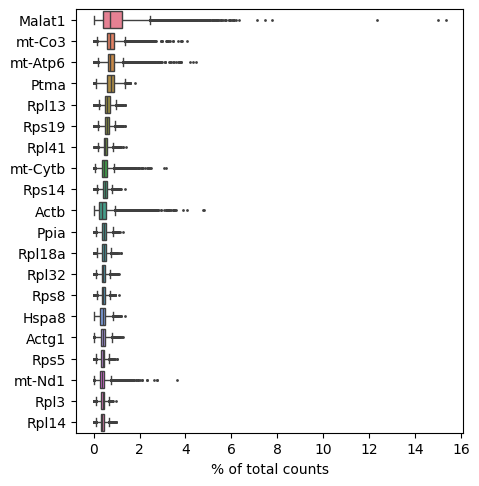

None


In [ ]:
print(sc.pl.highest_expr_genes(t1, n_top=20, ))

In [ ]:
sc.pp.normalize_total(t1, target_sum=1e4)
# sc.pp.log1p(t1)

In [ ]:
pseudobulk_t1 = t1.X.mean(axis=0)
print(pseudobulk_t1)

In [ ]:
# Generate new information about counts
t1.var_names_make_unique()
sc.pp.calculate_qc_metrics(t1, log1p=False, inplace=True)

frame1_obs = pd.DataFrame(t1.obs)
frame1_obs.drop(['pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'], axis=1)

frame1_vars = pd.DataFrame(t1.var)

In [ ]:
t1.layers["t1.X"] = t1.X
t1.to_df(layer="t1.X")

,Xkr4,Gm1992,Gm37381,Rp1,Rp1-1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,PISD,DHRSX,Vmn2r122,CAAA01147332.1
AAACCTGAGAACTGTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGACCACGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGACCCACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.8082,0.0,0.0,0.0
AAACCTGAGACTAGAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.686006,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGCCGATTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.892864,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAGCTGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCAGTCTTGATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCAGTTGCGCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCATCATGCATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.098853,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0


# Create Pseudobulk

In [ ]:
t0 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504959_E12.5_filtered_gene_bc_matrices.h5")
t1 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504960_E15.5_filtered_gene_bc_matrices.h5")
t2 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504961_E17.5_filtered_gene_bc_matrices.h5")
t3 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504962_P3_filtered_gene_bc_matrices.h5")
t4 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504963_P7_filtered_gene_bc_matrices.h5")
t5 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504964_P15_filtered_gene_bc_matrices.h5")
t6 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504965_P42_filtered_gene_bc_matrices.h5")

h5_files = [t0, t1, t2, t3, t4, t5, t6]
pseudo_bulks = []

In [4]:
t0.var_names
max_value = t0.X.max()
print(max_value)

4894.0


In [5]:
def pseudo_bulk(h5_file): # Creates pseudobulk of h5 file
  sc.pp.normalize_total(h5_file, target_sum=1e4)
  pseudobulk_h5_file = h5_file.X.mean(axis=0)

  values = []
  for i in range(pseudobulk_h5_file.shape[1]):
    values.append(pseudobulk_h5_file[0,i])

  return np.array(values)

In [6]:
def create_pseudo_bulk(h5_files): # Generates pseudobulk from all time-stamps
  pseudo_bulks = []
  for h5_file in h5_files:
    pseudo_h5 = pseudo_bulk(h5_file)
    pseudo_bulks.append(pseudo_h5)

  return np.array(pseudo_bulks)

In [ ]:
obs_names = {} # For .obs of bulk AnnData object
for i in range(len(h5_files)): # 7
  obs_names[i] = "TimeStamp" + str(i)
obs_frame = pd.DataFrame(list(obs_names.items()), columns=['Index', 'TimeStamp'])
print(obs_frame)

In [ ]:
bulks = create_pseudo_bulk(h5_files)
bulks_adata = ad.AnnData(bulks, obs=obs_frame, var=t0.var)

In [ ]:
print(bulks_adata.X)
print(bulks_adata.obs)
print(bulks_adata.var)

In [10]:
bulks_adata.obs['files'] = ['GSM4504959_E12.5_filtered_gene_bc_matrices.h5', 'GSM4504960_E15.5_filtered_gene_bc_matrices.h5',
                            'GSM4504961_E17.5_filtered_gene_bc_matrices.h5', 'GSM4504962_P3_filtered_gene_bc_matrices.h5',
                            'GSM4504963_P7_filtered_gene_bc_matrices.h5', 'GSM4504964_P15_filtered_gene_bc_matrices.h5',
                            'GSM4504965_P42_filtered_gene_bc_matrices.h5']

In [ ]:
bulks_adata.var['gene_ids']

In [ ]:
bulks_adata.obs['files']

In [13]:
def pick_gene(gene_no, gene_database=bulks_adata):
  return gene_database.X[:, gene_no]

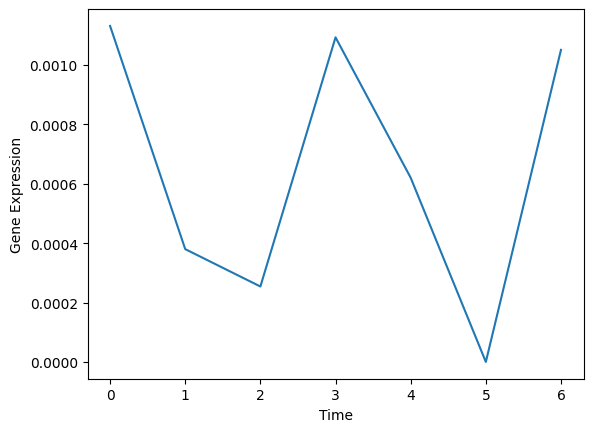

In [14]:
# Look at time series patterns of a selected gene
gene_timeseries = pick_gene(0)
def plot_geneseries(gene):
  length = [x for x in range(len(gene))]
  plt.plot(length, gene)
  plt.xlabel('Time')
  plt.ylabel('Gene Expression')

plot_geneseries(gene_timeseries)

# Model

### KNN Function
Find neighboring genes

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [15]:
neighbors = NearestNeighbors(n_neighbors=11) # k = 11, k-1 neighbors
neighbors.fit(bulks_adata.X.T)
def find_neighbors(g, neighbors_func=neighbors, gene_database=bulks_adata):
  neighbor_arr = neighbors_func.kneighbors([g])
  return neighbor_arr[1][0][1:]

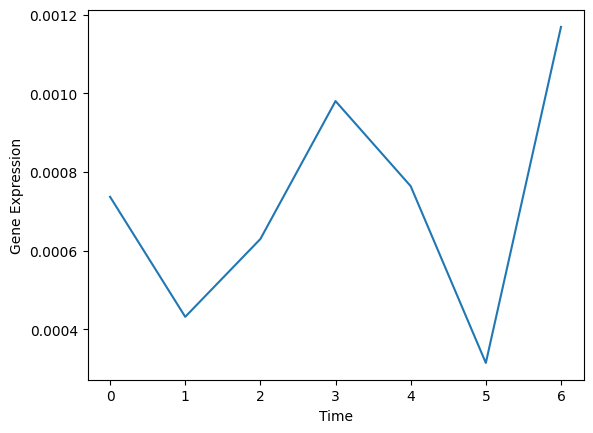

In [16]:
# Check, do the time series looks similar?
gene_0 = pick_gene(0)
gene0_neighbors = find_neighbors(gene_0)
plot_geneseries(pick_gene(gene0_neighbors[2]))

### Data Preprocessing

In [17]:
# Format input for NN
def format_input(g, gene_database=bulks_adata): # Shape input to our desired format: [g1,...,gt,n1,...,nt,1,2,...,t]
  neighbors = find_neighbors(g, gene_database=gene_database) # Get indices of all neighbors of g
  input = np.array(g)

  for n in neighbors:
    neighbor_gene = np.array(pick_gene(n))
    input = np.concatenate((input, neighbor_gene), axis=None) # Concat neighbors with original gene

  if input.max() != input.min():
    input = (input - input.min()) / (input.max() - input.min()) # Min-Max Normalization

  time_embeddings = [x for x in range(len(g))]
  final_input = np.concatenate((input, time_embeddings), axis=None) # Concat time embeddings
  return final_input

gene0 = format_input(pick_gene(0))
print(gene0)

[0.75754255 0.25431213 0.17004667 0.73180521 0.41523215 0.
 0.70357972 0.80143636 0.09539989 0.17995012 0.44339257 0.2857472
 0.18368013 0.57735926 0.52828127 0.0986848  0.1718421  0.80787009
 0.37072536 0.30425823 0.69264424 0.49303928 0.2886962  0.42116779
 0.65599185 0.51117957 0.21020764 0.78225166 0.80716008 0.50266284
 0.54381293 0.75319421 0.33344334 0.         0.59802955 0.70048475
 0.16624096 0.15188885 1.         0.16777797 0.23740506 0.53800917
 0.55576587 0.34264931 0.48185381 0.50593626 0.21403843 0.0802496
 0.71862894 0.59729737 0.53111166 0.38309911 0.63809484 0.48713082
 0.         0.37525132 0.80245364 0.39161089 0.2809217  0.43551081
 0.28942057 0.28085506 0.93651271 0.84756494 0.29441822 0.28136396
 0.50983042 0.66575754 0.         0.32883808 0.57782912 0.36621031
 0.40470961 0.47632495 0.42387655 0.33555099 0.84213352 0.
 1.         2.         3.         4.         5.         6.        ]


In [18]:
# Masking mechanism
def mask(time_points, input, mask_value=0): # Time points start form 0. Time points is of type array
  new_arr = input.copy()
  max_timepoints = input[len(input)-1] + 1
  masked = []

  for n in range(len(input)):
    if n % max_timepoints in time_points: # Mask each time-point for every neighbour
      masked.append(new_arr[n])
      new_arr[n] = mask_value # Masked with zero by default

  return new_arr, masked

test, masked = mask([1,3], gene0)
print(test, masked)

[0.75754255 0.         0.17004667 0.         0.41523215 0.
 0.70357972 0.80143636 0.         0.17995012 0.         0.2857472
 0.18368013 0.57735926 0.52828127 0.         0.1718421  0.
 0.37072536 0.30425823 0.69264424 0.49303928 0.         0.42116779
 0.         0.51117957 0.21020764 0.78225166 0.80716008 0.
 0.54381293 0.         0.33344334 0.         0.59802955 0.70048475
 0.         0.15188885 0.         0.16777797 0.23740506 0.53800917
 0.55576587 0.         0.48185381 0.         0.21403843 0.0802496
 0.71862894 0.59729737 0.         0.38309911 0.         0.48713082
 0.         0.37525132 0.80245364 0.         0.2809217  0.
 0.28942057 0.28085506 0.93651271 0.84756494 0.         0.28136396
 0.         0.66575754 0.         0.32883808 0.57782912 0.
 0.40470961 0.         0.42387655 0.33555099 0.84213352 0.
 0.         2.         0.         4.         5.         6.        ] [0.254312127828598, 0.7318052053451538, 0.0953998863697052, 0.4433925747871399, 0.09868479520082474, 0.80787009

In [ ]:
print(len(bulks_adata.var))

27998


In [ ]:
print(int(len(bulks_adata.var) * 0.8))

22398


In [19]:
# Mask arbitrary time-point
# Train X, Y
X_train = []
Y_train = []
for i in range(int(len(bulks_adata.var) * 0.8)): # 80%, 20% split
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i) # Pick gene and format the input
  masked, y = mask([randrange(len(gene_i))], formatted_input) # Mask arbitrary time-point
  X_train.append(masked)
  Y_train.append(y[0])

# Test X, Y
X_test = []
Y_test = []
for i in range(int(len(bulks_adata.var) * 0.8)+1, len(bulks_adata.var)):
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i)
  masked, y = mask([randrange(len(gene_i))], formatted_input)
  X_test.append(masked)
  Y_test.append(y[0])

In [66]:
# Mask all time-points
# Train X, Y
X_train_t = []
Y_train_t = []
for i in range(int(len(bulks_adata.var) * 0.8)): # 80%, 20% split
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i) # Pick gene and format the input

  for j in range(len(gene_i)): # Mask all time-points
    masked, y = mask([j], formatted_input)
    X_train_t.append(masked)
    Y_train_t.append(y[0])

# Test X, Y
X_test_t = []
Y_test_t = []
for i in range(int(len(bulks_adata.var) * 0.8)+1, len(bulks_adata.var)):
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i)

  for j in range(len(gene_i)):
    masked, y = mask([j], formatted_input)
    X_test_t.append(masked)
    Y_test_t.append(y[0])

In [61]:
print(X_train[0])
print(Y_train[0])

tensor([0.7575, 0.2543, 0.1700, 0.0000, 0.4152, 0.0000, 0.7036, 0.8014, 0.0954,
        0.1800, 0.0000, 0.2857, 0.1837, 0.5774, 0.5283, 0.0987, 0.1718, 0.0000,
        0.3707, 0.3043, 0.6926, 0.4930, 0.2887, 0.4212, 0.0000, 0.5112, 0.2102,
        0.7823, 0.8072, 0.5027, 0.5438, 0.0000, 0.3334, 0.0000, 0.5980, 0.7005,
        0.1662, 0.1519, 0.0000, 0.1678, 0.2374, 0.5380, 0.5558, 0.3426, 0.4819,
        0.0000, 0.2140, 0.0802, 0.7186, 0.5973, 0.5311, 0.3831, 0.0000, 0.4871,
        0.0000, 0.3753, 0.8025, 0.3916, 0.2809, 0.0000, 0.2894, 0.2809, 0.9365,
        0.8476, 0.2944, 0.2814, 0.0000, 0.6658, 0.0000, 0.3288, 0.5778, 0.3662,
        0.4047, 0.0000, 0.4239, 0.3356, 0.8421, 0.0000, 1.0000, 2.0000, 0.0000,
        4.0000, 5.0000, 6.0000])
tensor([0.7318])


In [20]:
X_train = torch.tensor(np.array(X_train), dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32).reshape(-1, 1)

X_test = torch.tensor(np.array(X_test), dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32).reshape(-1, 1)

In [69]:
X_train = torch.tensor(np.array(X_train_t), dtype=torch.float32)
Y_train = torch.tensor(Y_train_t, dtype=torch.float32).reshape(-1, 1)

X_test = torch.tensor(np.array(X_test_t), dtype=torch.float32)
Y_test = torch.tensor(Y_test_t, dtype=torch.float32).reshape(-1, 1)

### Regression DNN
[PyTorch](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)

In [ ]:
model = torch.load("/content/drive/MyDrive/Ding Lab")

In [21]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 48),
            nn.ReLU(),
            nn.Linear(48, 32),
            nn.ReLU(),
            nn.Linear(32, output_size)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [22]:
model = NeuralNetwork(84, 1)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
def train_model(model, X, y, optimizer, loss_fn, epochs):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Loss = {loss.item()}')

train_model(model, X_train, Y_train, optimizer, loss_fn, epochs=500)

Epoch 0: Loss = 0.24793335795402527
Epoch 100: Loss = 0.0640699490904808
Epoch 200: Loss = 0.042070042341947556
Epoch 300: Loss = 0.03404244780540466
Epoch 400: Loss = 0.03075726144015789


In [ ]:
torch.save(model, "/content/drive/MyDrive/Ding Lab")

In [24]:
def test_model(model, X_test, y_test, loss_fn):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        loss = loss_fn(predictions, y_test)
    return predictions, loss

In [25]:
predictions, test_loss = test_model(model, X_test, Y_test, loss_fn)
print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.028558146208524704


In [26]:
# RMSE
rmse = torch.sqrt(test_loss)
print(f'Root Mean Squared Error: {rmse.item()}')

# MAE
mae = torch.mean(torch.abs(predictions - Y_test))
print(f'Mean Absolute Error: {mae.item()}')

Root Mean Squared Error: 0.1689915508031845
Mean Absolute Error: 0.11612874269485474


#### Measuring Performance
For each gene, measure avg accuracy, correlation, MAE, MSE

In [27]:
def MAE(pred, y):
  return abs(pred-y)

def MSE(pred, y):
  return (pred-y)**2

def RMSE(pred, y):
  return torch.sqrt(MSE(pred, y))

In [76]:
# Given a gene, for each masked time point, measure metric on predicted value
def metric_for_timepoints(gene_no, metric_func, plot=False, printB=False):
  gene = pick_gene(gene_no)
  formatted_input = format_input(gene)

  metric_values = []
  for i in range(len(gene)):
    masked, y = mask([i], formatted_input)
    masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

    prediction = model(masked) # Get predicted value for time point i
    metric_measure = metric_func(prediction, y)[0].item() # Measure error using metric_func
    metric_values.append(metric_measure) # Append value of error

    if printB: print(f'{metric_func.__name__} for time point {i}: {metric_measure}') # Print error value for each time point

  metric_values = np.array(metric_values)

  if printB:
    print(f'Average {metric_func.__name__}: {metric_values.sum()/len(metric_values)}') # Print average value for all time points
    print(f'Lowest time point: {metric_values.argmin()}')

  if plot:
    length = [x for x in range(len(gene))]
    metric_values = [x.item() for x in metric_values]
    plt.plot(length, metric_values)
    plt.xlabel('Time')
    plt.ylabel('Measurement')

  return metric_values # Error values with metric_func for all time points for gene_no

In [77]:
vals = metric_for_timepoints(0, MAE, printB=True)

MAE for time point 0: 0.325399249792099
MAE for time point 1: 0.12352907657623291
MAE for time point 2: 0.19818474352359772
MAE for time point 3: 0.33421260118484497
MAE for time point 4: 0.283414751291275
MAE for time point 5: 0.20499303936958313
MAE for time point 6: 0.25280049443244934
Average MAE: 0.24607627945286886
Lowest time point: 1


In [71]:
# Average metric of specific time point, for genes form 0 to test_timepoints. Prints avg for all genes at specified time point
def avg_metric_specifictime(metric_func, time_points=len(bulks_adata.obs), number_genes=len(bulks_adata.var), printB=False):
  avg_val = np.zeros(time_points)

  for i in range(number_genes):
    vals = metric_for_timepoints(i, metric_func)
    avg_val += vals

  avg_allTS = 0

  for t in range(time_points):
    avg_allTS += avg_val[t]/number_genes
    if printB: print(f'Average {metric_func.__name__} value for all genes at time point {t}: {avg_val[t]/number_genes}')

  print(f'Average {metric_func.__name__} value for all genes: {avg_allTS/time_points}')

  return avg_val

In [72]:
tavg_MAE = avg_metric_specifictime(MAE, printB=True)

Average MAE value for all genes at time point 0: 0.12471292374583055
Average MAE value for all genes at time point 1: 0.1182585622703095
Average MAE value for all genes at time point 2: 0.12016948669998098
Average MAE value for all genes at time point 3: 0.10976305990682131
Average MAE value for all genes at time point 4: 0.12103289102644359
Average MAE value for all genes at time point 5: 0.1163304136110048
Average MAE value for all genes at time point 6: 0.1319447682289743
Average MAE value for all genes: 0.12031601506990929


In [126]:
# Calculate correlation for predicted and truth value for all genes, at a specific time point
def correlation_timepoint(time_point, printB=False, plot=False):
  if time_point >= len(bulks_adata.obs):
    print(f'Time point {time_point} out of range')
    return None

  y_truth = np.zeros(len(bulks_adata.var))
  y_pred = np.zeros(len(bulks_adata.var))

  for i in range(len(bulks_adata.var)):
    gene_i = pick_gene(i)
    formatted_input = format_input(gene_i)

    masked, y = mask([time_point], formatted_input)
    masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

    prediction = model(masked) # Get predicted value for masked time_point

    y_truth[i] = y.item()
    y_pred[i] = prediction.item()

  SSR = np.square((y_truth-y_pred)).sum()
  SST = np.square((y_truth-y_truth.mean())).sum()
  R_square = 1 - SSR/SST

  r = scipy.stats.pearsonr(y_truth, y_pred)
  r_square = r[0]**2

  if printB:
    print(f'Pearson Correlation Coefficient (R) {time_point}: {r[0]}')
    print(f'Coefficient of Determination (R^2) {time_point}: {r_square}')
    print(f'R^2 manual {R_square}')

  if plot:
    plt.title(f"Scatter plot of true and predicted values for all genes at time {time_point}")
    plt.scatter(y_truth, y_pred)
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.show()
  return r[0]

Pearson Correlation Coefficient 0: 0.8557331441318726
Coefficient of Determination 0: 0.7322792139658203
R^2 manual 0.7320841126865358


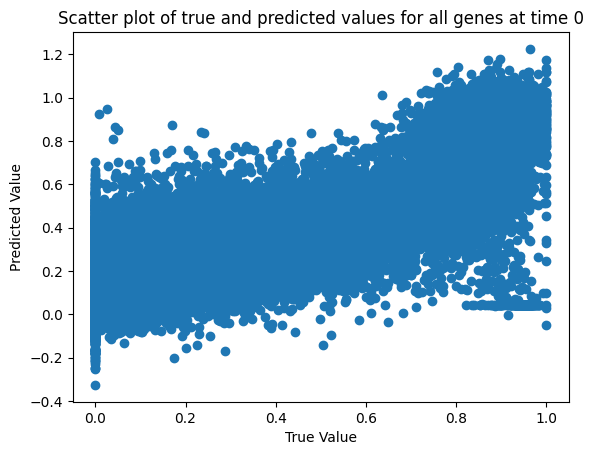

In [118]:
r_0 = correlation_timepoint(0, True, True)

In [124]:
# Calculate average correlation for predicted and truth value for all genes, for all time points
def correlation_avg(printB=False):
  avg_r = 0
  avg_r_square = 0
  for i in range(len(bulks_adata.obs)):
    r_i = correlation_timepoint(i)
    avg_r += r_i
    avg_r_square += r_i**2

  avg_r = avg_r/len(bulks_adata.obs)
  avg_r_square = avg_r_square/len(bulks_adata.obs)

  if printB:
    print(f'Average Pearson Correlation Coefficient (R): {avg_r}')
    print(f'Average Coefficient of Determination (R^2): {avg_r_square}')

  return avg_r, avg_r_square

In [127]:
avg_r, avg_r_square = correlation_avg(printB=True)

Average Pearson Correlation Coefficient: 0.800186791717009
Average Coefficient of Determination: 0.6414143005432914
